# Bussville
The city of Busville contains three school districts. The number of nonminority and minority students in each district is given in the first table below. The court has mandated that each of the town's two high schools (Cooley and Whitman) must have approximately the same percentage of minority students-within 5\% of the minority
population of the entire pool of students. The distances (in miles) between the school districts and the high schools are indicated in the second table below. Each school must have an enrolment of between 350 and 500 students:<br>

|District|Minority Students|Nonminority Students|
|--------|-----------------|--------------------|
|1       |50               |200                 |
|2       |50               |250                 |
|3       |100              |150                 |


|District|Cooley|Whitman|
|--------|------|-------|
|1       |1.2   |1.8    |
|2       |2.2   |0.9    |
|3       |1.4   |0.8    |

### Determine an assignment of students to schools that minimizes the total distance that students must travel to school. Remember to include the constraint that every student must attend school!

In [1]:
# Load the gams extension
%load_ext gams_magic

# Enable plots to be shown in notebook
%matplotlib inline
from matplotlib import pyplot as plt

__The GAMS Model:__

In [2]:
%%gams

Set
    i 'district'  / d1*d3 /    
    j 'students type'  / minority, nonminority /
    k 'schools'   / Cooley,	Whitman /;


Table n(i,j) 'number of nonminority and minority students in each district'
         minority nonminority
    d1      50       200
    d2      50       250
    d3      100      150;
        
Table d(i,k) 'distances between districts and schools'
           Cooley	Whitman
    d1      1.2       1.8
    d2      2.2       0.9
    d3      1.4       0.8;

Variables
    x(i,j,k) 'number of students from district i, type j, attending school k'
    z 'total distance that students must travel to school';
   
Positive Variable x;  

Equation
    attend(i,j) 'each student must attend school'
    obj 'calculate the total distance'
    mandated_1 'court mandated 1'
    mandated_2 'court mandated 2'
    enrolment_min(k)
    enrolment_max(k);

    attend(i,j).. sum(k,x(i,j,k)) =e= n(i,j);
    obj.. sum((i,j,k),x(i,j,k)*d(i,k)) =e= z;
    mandated_1.. sum(i,x(i,'minority','Cooley')) - sum(i,x(i,'minority','Whitman')) =l= 0.05 * sum(i,n(i,'minority'));
    mandated_2.. sum(i,x(i,'minority','Whitman')) - sum(i,x(i,'minority','Cooley')) =l= 0.05 * sum(i,n(i,'minority'));  
    enrolment_min(k).. sum((i,j),x(i,j,k)) =g= 350;
    enrolment_max(k).. sum((i,j),x(i,j,k)) =l= 500;

model prob /all/;
Options LP  = Cplex;
Solve prob using LP minimizing z;

display z.l, x.l; 


,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),830.0,13,13,LP,CPLEX,0


__Pull the variable values from GAMS and create a pie chart for the student population:__

In [3]:
# Pull the values of studentPopulation and studentsBused (variables) 
# from GAMS to Python as a pandas dataframe
# %gams_pull -d studentPopulation studentsBused
#display(studentPopulation,studentsBused)

%gams_pull -d x
x
import pandas as pd

studentPopulation = pd.DataFrame(x)
studentPopulation = studentPopulation[['i','j','k','level']]
studentPopulation.columns = ['districts', 'groups', 'schools','level']
studentPopulation['districts'] = studentPopulation['districts'].str.strip().str[-1]
#print(studentPopulation)
studentsBused = pd.DataFrame(studentPopulation)

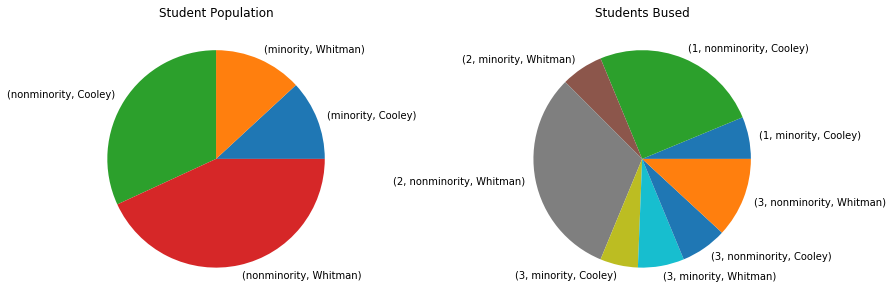

In [4]:
fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(14,5))
studentPopulation.pivot_table(index=['groups','schools'],values=['level']).plot.pie(ax=ax0,y='level',legend=False)
ax0.set_ylabel('')
ax0.set_title('Student Population');
studentsBused.pivot_table(index=['districts','groups','schools'],values=['level']).plot.pie(ax=ax1,y='level',legend=False)
ax1.set_ylabel('')
ax1.set_title('Students Bused');